In [116]:
import numpy as np
import matplotlib.pyplot as plt

In [117]:
#coordinates and connectivity

Cord=np.array([[3,0],[0,2],[0,6]])
Conec=np.array([[1,2],[2,3]])-1
theta=np.array([-56.309932,0,0]) #-56.309932
theta=np.deg2rad(theta,dtype=float,)
membs=(Conec.shape[0])
ndof=3*(Cord.shape[0])

In [118]:
#store the sin and cos of each member as C and S

lamxy=np.zeros(Conec.shape)
for i in range(len(Conec)):
    C=np.cos(theta[i])
    S=np.sin(theta[i])
    lamxy[i]=np.array([C,S])
print(lamxy)

[[ 0.6 -0.8]
 [ 1.   0. ]]


In [119]:
#section information

E=200e6
A=4e-2
I=1e-6


In [120]:
#function calucates length of each member
def Lmember(Cordinates, Conec,member=1):
    m=member
    Cord=Cordinates
    Conec=Conec
    x1,y1= Cord[Conec[m,0]][0], Cord[Conec[m,0]][1]
    x2,y2= Cord[Conec[m,1]][0], Cord[Conec[m,1]][1]
    L=np.power( (np.power((x1-x2),2) + np.power((y1-y2),2)),0.5)
    return L


In [121]:
#length of all the members stored in Lenths array
Lenths=np.zeros((membs,))
for i in range(membs):
    Lenths[i]=Lmember(Cord,Conec,member=i)
print(Lenths)   

[3.6 4. ]


In [122]:
#element stiffness matrix
km=np.zeros((membs,6,6))
for i in range(membs):
    L=Lenths[i]
    C=lamxy[i][0]
    S=lamxy[i][1]
    
    P=((12*I)/L**2) 
    Q= (6*I)/L
    w1 = A*C*C + 12*I*S*S/(L*L)
    w2 = A*S*S + 12*I*C*C/(L*L)
    w3 = (A-12*I/(L*L))*C*S
    w4 = 6*I*S/L
    w5 = 6*I*C/L
    km[i] = (E/L)*np.array([[w1, w3, -w4, -w1, -w3, -w4],
                             [w3, w2, w5, -w3, -w2, w5,],
                            [-w4, w5, 4*I, w4, -w5, 2*I],
                            [-w1, -w3, w4, w1, w3, w4],
                            [-w3, -w2, -w5, w3, w2, -w5], 
                            [-w4, w5, 2*I, w4, -w5, 4*I]])
#     km[i]= (E/L)*np.array([ [A*C**2 + P*S**2 , (A-P)*C*S, -Q*S, -(A*C**2 + P*S**2), -(A-P)*C*S, -(Q*S)],
#                   [(A-P)*C*S,  A*S**2 + P*C**2, Q*C, -(A-P)*C*S, -(A*S**2 + P*C**2) ,Q*C],
#                  [-(Q*S),Q*C,4*I, Q*S,-(Q*C),2*I],
#                  [ -(A*C**2 + P*S**2), -(A-P)*C*S, Q*S, (A*C**2 + P*S**2), (A-P)*C*S, Q*S],
#                  [-(A-P)*C*S, -(A*S**2 + P*C**2) , -(Q*C), -(A-P)*C*S,A*S**2+P*C**2, -(P*C) ],
#                  [-(Q*S),Q*C,2*I,Q*S,-(Q*C),4*I]])

np.set_printoptions(suppress=True,precision=7)

In [123]:
#connectivity information of each member

dofs=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])-1
Cord=np.array([[0,0],[0,3],[4,3],[4,0]])
Conec=np.array([[1,2],[2,3],[4,3]])-1
dof_label=np.zeros((membs,6),dtype=int)
for i in range(membs):
    p,q=Conec[i]
    dof_label[i]=np.concatenate((dofs[p],dofs[q]),)   
print(dof_label)  

[[0 1 2 3 4 5]
 [3 4 5 6 7 8]]


In [143]:
#global matrix
# np.set_printoptions(precision=4)
np.set_printoptions(precision=1,suppress=True)
KK=np.zeros((ndof,ndof))
for p in range(km.shape[0]):
    for q in range(km.shape[1]):
        for r in range(km.shape[2]):
            KK[dof_label[p][r],dof_label[p][q]]+=km[p][q][r]
print('\n******************GLOBAL STIFFNESS MATRIX***************************\n')            
print(np.round(KK/1000,3))


******************GLOBAL STIFFNESS MATRIX***************************

[[  682.7 -1024.      0.1  -682.7  1024.      0.1     0.      0.      0. ]
 [-1024.   1536.1     0.1  1024.  -1536.1     0.1     0.      0.      0. ]
 [    0.1     0.1     0.2    -0.1    -0.1     0.1     0.      0.      0. ]
 [ -682.7  1024.     -0.1  2682.7 -1024.     -0.1 -2000.      0.      0. ]
 [ 1024.  -1536.1    -0.1 -1024.   1536.1     0.      0.     -0.      0.1]
 [    0.1     0.1     0.1    -0.1     0.      0.4     0.     -0.1     0.1]
 [    0.      0.      0.  -2000.      0.      0.   2000.      0.      0. ]
 [    0.      0.      0.      0.     -0.     -0.1     0.      0.     -0.1]
 [    0.      0.      0.      0.      0.1     0.1     0.     -0.1     0.2]]


In [144]:
#post processing

np.set_printoptions(precision=6,suppress=True)
dof_seq=np.array([4,5,6,1,2,3,7,8,9])-1  #[knows unknowns]----
free_dofs=3
xx=free_dofs
uk=dof_seq[xx:]
uu=dof_seq[:xx]
print(uk)

[0 1 2 6 7 8]


In [145]:
F=np.zeros((ndof,))
UU=np.zeros((ndof,))
U=np.zeros((ndof,))

In [146]:
F[3]=0 #kn
F[4]=-16
F[5]=-10.667
F=F[dof_seq]
fk=F[:xx]


In [147]:
#Kpp=KG[np.ix_(dof_seq[:xx],dof_seq[:xx])]
k11=KK[np.ix_(uu,uu)]


In [148]:
print(f' 10e6 \n* {k11/1000}')

 10e6 
* [[ 2682.743399 -1024.038276    -0.076805]
 [-1024.038276  1536.146089     0.023797]
 [   -0.076805     0.023797     0.42188 ]]


In [149]:
k11=np.linalg.inv(k11)

UK=np.matmul(k11,fk)

In [150]:
np.set_printoptions(precision=4)
print('\n unknown displacements\n')
print(UK)


 unknown displacements

[-0.     -0.     -0.0253]


In [151]:
#supplying unknown displacemnts into main nodal displacement vecotr
UU[:xx]=UK

#resequencing the nodal displacement vector as indexed from 0 - dofs
U[dof_seq]=UU

In [152]:
# for i in range(len(dof_seq)):
#     U[dof_seq[i]]=UU[i]
#     P[dof_seq[i]]=FF[i]

In [153]:
#Global force vector
F=np.matmul(KK,U)
print('\n******************GLOBAL NODAL FORCES VECTOR-kN***************************\n')
print(np.vstack(F))


******************GLOBAL NODAL FORCES VECTOR-kN***************************

[[-12.2064]
 [ 14.1031]
 [ -2.8039]
 [  0.    ]
 [-16.    ]
 [-10.667 ]
 [ 12.2064]
 [  1.8969]
 [ -2.5295]]


In [154]:
#eleU stores element displacements of each dof 
eleU=np.zeros((membs,6))

In [155]:
for i in range(membs):
    p,q=Conec[i]
    eleU[i]=np.concatenate((U[dofs[p]],U[dofs[q]]))

In [156]:
#eaach vector has the nodal displacements of a particular memeber
print('\n******************Member nodal displacemebts-mm***************************\n')
print(eleU.T)


******************Member nodal displacemebts-mm***************************

[[ 0.     -0.    ]
 [ 0.     -0.    ]
 [ 0.     -0.0253]
 [-0.      0.    ]
 [-0.      0.    ]
 [-0.0253  0.    ]]


In [157]:
#member force function
def memforce(lamxy,Lenths,eleU,member=1):
    i=member
    L=Lenths[i]
    C=lamxy[i][0]
    S=lamxy[i][1]
    w1 = E*A/L;
    w2 = 12*E*I/(L*L*L);
    w3 = 6*E*I/(L*L);
    w4 = 4*E*I/L;
    w5 = 2*E*I/L;
    u=eleU[i].T
    kprime = np.array([[w1, 0, 0, -w1, 0, 0],
                       [0, w2, w3, 0, -w2, w3],
                        [0, w3, w4, 0, -w3, w5],
                        [-w1, 0, 0, w1, 0, 0,],
                        [0, -w2, -w3, 0, w2, -w3],
                       [0, w3, w5, 0, -w3, w4]]);
    T = np.array([[C, S, 0, 0, 0, 0],
                  [-S, C, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, C, S, 0],
                  [0, 0, 0, -S, C, 0],
                  [0, 0, 0, 0, 0, 1]])
    y = np.matmul(kprime,np.matmul(T,u))   #nodal force for each vector: kprime*T*u
    return y

In [158]:
#this stores the member forces of all the members 
memberforces=np.zeros((membs,6))
for i in range(membs):
    memberforces[i]=memforce(lamxy,Lenths,eleU, member=i)


In [159]:
##member forces-Each column corrresponds to a particular member

print(memberforces.T)

[[-18.5054 -12.2064]
 [ -2.3333  -1.8969]
 [ -2.8039  -5.058 ]
 [ 18.5054  12.2064]
 [  2.3333   1.8969]
 [ -5.609   -2.5295]]


In [160]:
memberforces1[1]-=np.array([0,-16,-10.667,0,-16,10.667])
memberforces[1]-=np.array([0,-16,-10.667,0,-16,10.667])
print('\n******************Element forces-***************************\n')
print(memberforces.T)


******************Element forces-***************************

[[-18.5054 -12.2064]
 [ -2.3333  14.1031]
 [ -2.8039   5.609 ]
 [ 18.5054  12.2064]
 [  2.3333  17.8969]
 [ -5.609  -13.1965]]


In [161]:

#ploting SF, BM and Axial forces

# fig,axs=plt.subplots(nrows=3, ncols=1, ) #sharex=True
def figs(Lenths,member=1):
    member=member
    x=[0,Lenths[member]]
    #bm

    y_bm=np.multiply(memberforces[member,[2,-1]],np.array([-1,1]))
    y_sf=np.multiply(memberforces[member,[1,-2]],np.array([1,-1]))
    y_ax=memberforces[member,[-3,-3]]
    plt.plot(x,y_bm,color='b',label="BM")
    plt.title(f'Member {member+1}')
    plt.xlabel('Lenght-m')
    plt.ylabel('kN-m')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    plt.plot(x,y_sf,color='g',label='SF')
    plt.xlabel('Lenght-m')
    plt.ylabel('kN')
    plt.title(f'Member {member+1}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    
    plt.plot(x,y_ax,color='k',label='Axial')
    plt.title(f'Member {member+1}')
    plt.xlabel('Length-m')
    plt.ylabel('kN')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


In [162]:
#if we want to show all the figures of all the members at once
# for i in range(membs):
#     figs(Lenths,member=i)

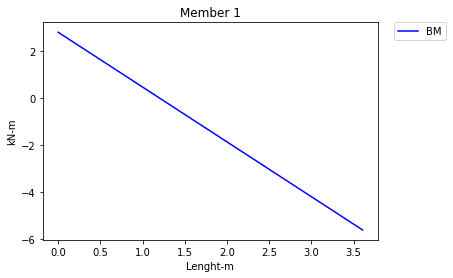

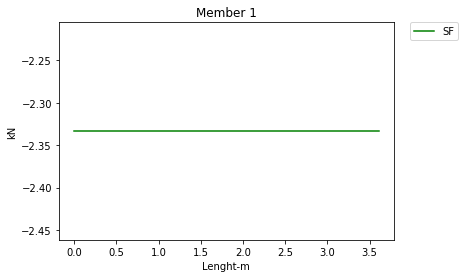

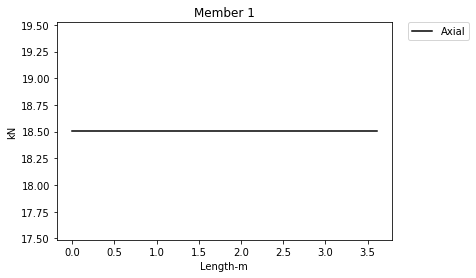

In [163]:
figs(Lenths,member=0)

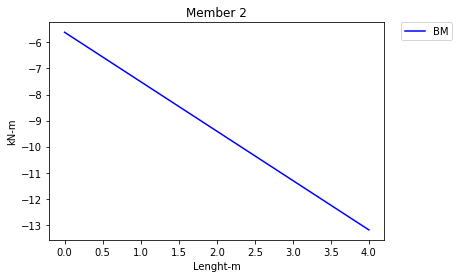

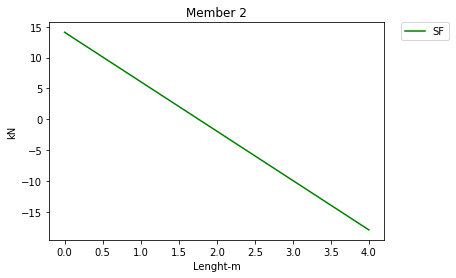

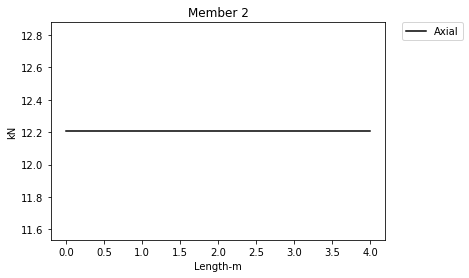

In [164]:
figs(Lenths,member=1)

 ------------------------------------------------------------------------------------------------------------------------------
## END